In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('./titanic/titanic_train.csv')
predict_df = pd.read_csv('./titanic/test.csv')
gender_submission_df = pd.read_csv('./titanic/gender_submission.csv')

In [191]:
print("train_df 데이터의 행 개수:", len(train_df))
print('train_df: 데이터 세트 Null 값 갯수 ',train_df.isnull().sum().sum())
print(train_df.isnull().sum())
print(train_df.columns)
print("------------------------------------------------------------ \n\n")

print("predict_df 데이터의 행 개수:", len(predict_df))
print('predict_df: 데이터 세트 Null 값 갯수 ',predict_df.isnull().sum().sum())
print(predict_df.isnull().sum())
print(predict_df.columns)
print("------------------------------------------------------------ \n\n")

print(f"gender_submission_df 데이터의 행 개수: {gender_submission_df.shape[0]}")
print('gender_submission_df: 데이터 세트 Null 값 갯수 ',gender_submission_df.isnull().sum().sum())
print(gender_submission_df.isnull().sum())

train_df 데이터의 행 개수: 891
train_df: 데이터 세트 Null 값 갯수  866
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
------------------------------------------------------------ 


predict_df 데이터의 행 개수: 418
predict_df: 데이터 세트 Null 값 갯수  414
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
------------------------------------------------------------ 



In [192]:
train_df.groupby(['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [193]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Sex

In [194]:
print('성별 분포')
train_df['Sex'].value_counts()

성별 분포


Sex
male      577
female    314
Name: count, dtype: int64

In [195]:
print(train_df.groupby(['Sex','Survived'])['Survived'].count())
print("\n-------------------------------------------------------------\n")

female = train_df[train_df['Sex'] == 'female'].shape[0]
female_0 = train_df[(train_df['Sex'] == 'female') & (train_df['Survived'] == 0)].shape[0]
female_1 = train_df[(train_df['Sex'] == 'female') & (train_df['Survived'] == 1)].shape[0]

male = train_df[train_df['Sex'] == 'male'].shape[0]
male_0 = train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == 0)].shape[0]
male_1 = train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == 1)].shape[0]

print(f"여성 생존률: {round(female_1 / (female_0 + female_1) * 100, 2)}")
print(f"남성 생존률: {round(male_1 / (male_0 + male_1) * 100, 2)}")

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

-------------------------------------------------------------

여성 생존률: 74.2
남성 생존률: 18.89


/var/folders/7p/kq4ytf3n0rx3163p8dqq9x080000gn/T/ipykernel_3083/3875526198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y = 'Survived', data=train_df, palette=custom_palette)


<Axes: xlabel='Sex', ylabel='Survived'>

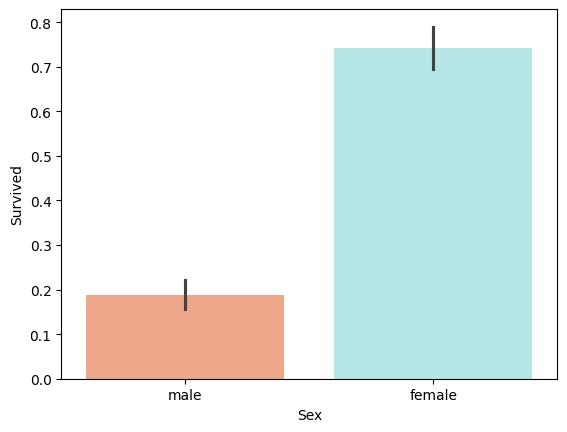

In [196]:
custom_palette = ["#FFA07A", "#AFEEEE"]
sns.barplot(x='Sex', y = 'Survived', data=train_df, palette=custom_palette)

# Age

In [197]:
train_df.groupby(['Age', 'Survived'])['Survived'].count()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 142, dtype: int64

In [198]:
nan_age_df = train_df[train_df['Age'].isna()]
nan_counts_by_pclass = nan_age_df.groupby(['Pclass'])['PassengerId'].count()
nan_counts_by_pclass

Pclass
1     30
2     11
3    136
Name: PassengerId, dtype: int64

In [199]:
average_pclass = train_df.groupby('Pclass')['Age'].mean()
train_df['Age'] = train_df.apply(lambda row: average_pclass[row['Pclass']] if pd.isna(row['Age']) else row['Age'], axis=1)
# NaN 값 확인
train_df['Age'].isna().sum()

0

In [200]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 8: cat = 'Baby'
    elif age <= 13: cat = 'Child'
    elif age <= 19: cat = 'Teenager'
    elif age <= 26: cat = 'Student'
    elif age <= 39: cat = 'Young Adult'
    elif age <= 64: cat = 'Adult'
    else: cat = 'Elderly'        
    return cat

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
 
train_df['Age_range'] = train_df['Age'].apply(lambda x : get_category(x))
predict_df['Age_range'] = predict_df['Age'].apply(lambda x : get_category(x))

In [201]:
age_range_pclass = train_df.groupby(['Age_range', 'Pclass']).size().unstack()
age_range_pclass

Pclass,1,2,3
Age_range,,,
Adult,75,35,42
Baby,3,17,34
Child,1,1,15
Elderly,6,2,3
Student,23,32,236
Teenager,17,17,59
Young Adult,91,80,102


<Axes: xlabel='Age_range', ylabel='Survived'>

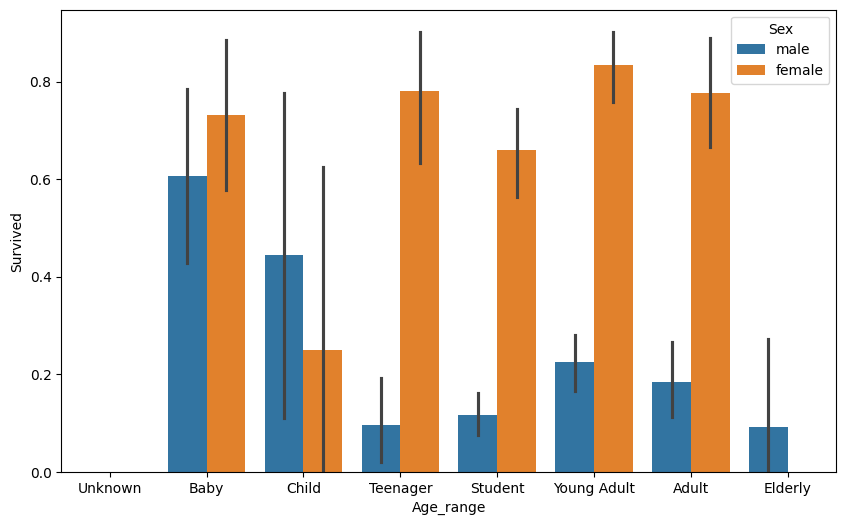

In [202]:
# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x='Age_range', y = 'Survived', hue='Sex', data=train_df, order=group_names)

In [203]:
age_range_pclass_distribution = train_df.groupby(['Age_range', 'Pclass']).size().unstack()
child_pclass_distribution = age_range_pclass_distribution.loc['Child']
child_pclass_distribution

Pclass
1     1
2     1
3    15
Name: Child, dtype: int64

# 사회적 지위

In [204]:
train_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

/var/folders/7p/kq4ytf3n0rx3163p8dqq9x080000gn/T/ipykernel_3083/2324609461.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Pclass', y='Survival Rate (%)', data=pclass_survived, palette=custom_palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


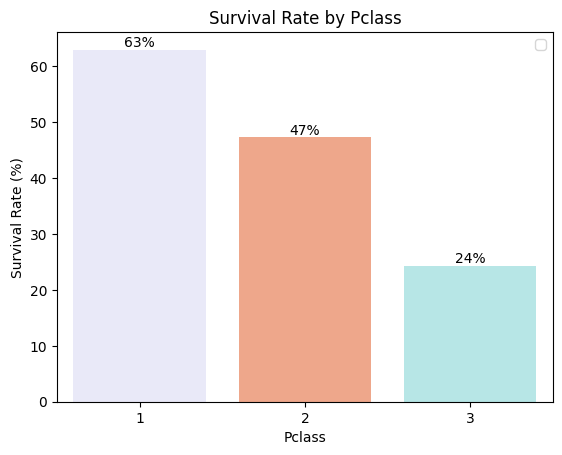

In [205]:
pclass = ["1", "2", "3"]
pclass_survived = {}
for i in pclass:
    total = train_df[train_df['Pclass'] == int(i)].shape[0]
    survived =  train_df[(train_df['Pclass'] == int(i)) & (train_df['Survived'] == 1)].shape[0]
    pclass_survived[i] = round(survived / total * 100, 2)

pclass_survived = pd.DataFrame.from_dict(pclass_survived, orient='index', columns=['Survival Rate (%)'])
pclass_survived = pclass_survived.reset_index()
pclass_survived.columns = ['Pclass', 'Survival Rate (%)']

custom_palette = ["#E6E6FA", "#FFA07A", "#AFEEEE"]
plt.figure()
ax = sns.barplot(x='Pclass', y='Survival Rate (%)', data=pclass_survived, palette=custom_palette)

for i, v in enumerate(pclass_survived['Survival Rate (%)']):
    ax.text(i, v, f"{v:.0f}%", color='black', ha='center', va='bottom', fontsize=10)

# 제목, x축 레이블, y축 레이블 추가
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.legend()
plt.show()

In [206]:
train_df.groupby(['Fare','Survived'])['Survived'].count()

Fare      Survived
0.0000    0           14
          1            1
4.0125    0            1
5.0000    0            1
6.2375    0            1
                      ..
247.5208  1            1
262.3750  1            2
263.0000  0            2
          1            2
512.3292  1            3
Name: Survived, Length: 330, dtype: int64

/var/folders/7p/kq4ytf3n0rx3163p8dqq9x080000gn/T/ipykernel_3083/1465756381.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Fare_range', y='Survival Rate (%)', data=fare_survived_df, palette=custom_palette)


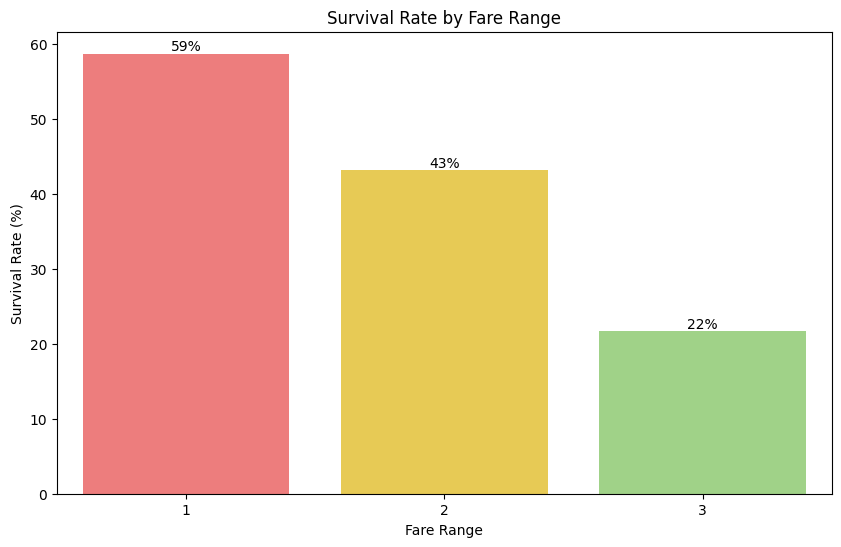

In [207]:
def get_category(fare):
    cat = ''
    if fare >= 30: cat = 1
    elif fare >= 12: cat = 2
    else: cat = 3
    return cat

group_names = [1, 2, 3]
 
train_df['Fare_range'] = train_df['Fare'].apply(lambda x : get_category(x))
predict_df['Fare_range'] = predict_df['Fare'].apply(lambda x : get_category(x))

Fare_ranges = np.unique(train_df['Fare_range'].values)
Fare_range_survived = {}

for i in Fare_ranges:
    total = train_df[train_df['Fare_range'] == int(i)].shape[0]
    survived =  train_df[(train_df['Fare_range'] == int(i)) & (train_df['Survived'] == 1)].shape[0]
    if survived != 0:
        Fare_range_survived[i] = round(survived / total * 100, 2) 
    else:
        Fare_range_survived[i] = 0

fare_survived_df = pd.DataFrame.from_dict(Fare_range_survived, orient='index', columns=['Survival Rate (%)'])
fare_survived_df = fare_survived_df.reset_index()
fare_survived_df.columns = ['Fare_range', 'Survival Rate (%)']

custom_palette = ["#FF6B6B", "#FFD93D", "#9BDE7C"]
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Fare_range', y='Survival Rate (%)', data=fare_survived_df, palette=custom_palette)

for i, v in enumerate(fare_survived_df['Survival Rate (%)']):
    ax.text(i, v, f"{v:.0f}%", color='black', ha='center', va='bottom', fontsize=10)

plt.title('Survival Rate by Fare Range')
plt.xlabel('Fare Range')
plt.ylabel('Survival Rate (%)')
plt.xticks(ticks=[0, 1, 2], labels=['1', '2', '3'], rotation=0)
plt.show()

In [208]:
train_df.groupby(['Pclass'])['Fare_range'].value_counts()

Pclass  Fare_range
1       1             174
        2              36
        3               6
2       2             125
        3              34
        1              25
3       3             333
        2             117
        1              41
Name: count, dtype: int64

In [209]:
fare_range_3_data = train_df[train_df['Fare_range'] == 3]
fare_range_3_data[fare_range_3_data['Pclass']==1]

# grouped_fare_range_3 = fare_range_3_data.groupby('Pclass').size()
# grouped_fare_range_3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,Fare_range
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S,Adult,3
633,634,0,1,"Parr, Mr. William Henry Marsh",male,38.233441,0,0,112052,0.0,NaN,S,Young Adult,3
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0,A36,S,Young Adult,3
815,816,0,1,"Fry, Mr. Richard",male,38.233441,0,0,112058,0.0,B102,S,Young Adult,3
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.000000,0,0,19972,0.0,NaN,S,Young Adult,3
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.000000,0,0,695,5.0,B51 B53 B55,S,Young Adult,3


In [210]:
plcass_sex_age = [
    'Pclass', 'Sex', 'Age_range']
print(plcass_sex_age, '\n')

train_df['plcass_sex_age'] = train_df[plcass_sex_age].apply(lambda x: '_'.join(x.astype(str)), axis=1)
predict_df['plcass_sex_age'] = predict_df[plcass_sex_age].apply(lambda x: '_'.join(x.astype(str)), axis=1)

plcass_sex_age_to_drop = ['Pclass', 'Sex', 'Age_range']
# train_df = train_df.drop(columns=[col for col in plcass_sex_age_to_drop if col in train_df.columns])
# predict_df = predict_df.drop(columns=[col for col in plcass_sex_age_to_drop if col in predict_df.columns])

['Pclass', 'Sex', 'Age_range'] 



# Embarked

In [212]:
print(train_df['Embarked'].count())
train_df[train_df['Embarked'].isna()]

889


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,Fare_range,plcass_sex_age
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Young Adult,1,1_female_Young Adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Adult,1,1_female_Adult


In [213]:
embarked_pclass_counts = train_df.groupby(['Embarked', 'Pclass']).size().unstack()
embarked_pclass_counts

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


/var/folders/7p/kq4ytf3n0rx3163p8dqq9x080000gn/T/ipykernel_3083/3287270845.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Embarked', y='Survival Rate (%)', data=df_embarked_survived, palette=custom_palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C Embarked 생존률: 55.36
Q Embarked 생존률: 38.96
S Embarked 생존률: 33.7


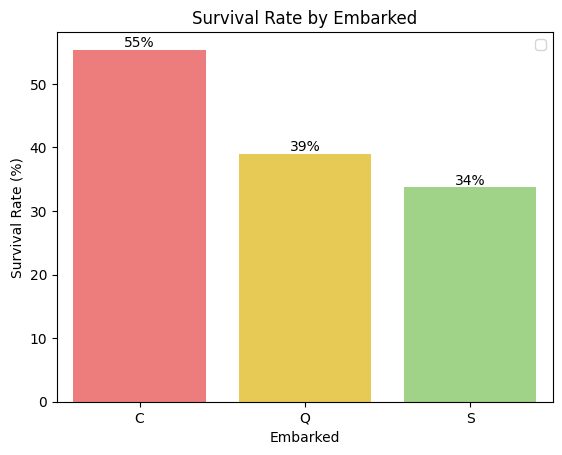

In [214]:
embarkeds = ["C", "Q", "S"]
embarked_survived = {}

for i in embarkeds:
    total = train_df[train_df['Embarked'] == i].shape[0]
    survived =  train_df[(train_df['Embarked'] == i) & (train_df['Survived'] == 1)].shape[0]
    embarked_survived[i] = round(survived / total * 100, 2)

for i in embarked_survived:
    print(f"{i} Embarked 생존률: {embarked_survived[i]}")


df_embarked_survived = pd.DataFrame.from_dict(embarked_survived, orient='index', columns=['Survival Rate (%)'])
df_embarked_survived = df_embarked_survived.reset_index()
df_embarked_survived.columns = ['Embarked', 'Survival Rate (%)']

custom_palette = ["#FF6B6B", "#FFD93D", "#9BDE7C"]
plt.figure()
ax = sns.barplot(x='Embarked', y='Survival Rate (%)', data=df_embarked_survived, palette=custom_palette)

for i, v in enumerate(df_embarked_survived['Survival Rate (%)']):
    ax.text(i, v, f"{v:.0f}%", color='black', ha='center', va='bottom', fontsize=10)

plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate (%)')
plt.legend()
plt.show()

In [215]:
train_df.loc[train_df['Embarked'].isna(), 'Embarked'] = 'C'

# Cabin

In [216]:
train_df[train_df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,Fare_range,plcass_sex_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,Student,3,3_male_Student
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Student,3,3_female_Student
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,Young Adult,3,3_male_Young Adult
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,NaN,Q,Student,3,3_male_Student
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S,Baby,2,3_male_Baby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.00000,0,0,SOTON/OQ 392076,7.0500,NaN,S,Student,3,3_male_Student
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00000,0,5,382652,29.1250,NaN,Q,Young Adult,2,3_female_Young Adult
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S,Young Adult,2,2_male_Young Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S,Student,2,3_female_Student


# SibSp, Parch

In [217]:
train_df.groupby(['SibSp','Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [218]:
train_df.groupby(['Parch','Survived'])['Survived'].count()

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

# 필요 없는 feature 삭제

In [ ]:
def drop_features(df):
    df.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Age', 'Fare'], axis=1, inplace=True)

    y = df['Survived']
    df = df.drop('Survived', axis=1, inplace=False)
    return df, y

In [ ]:
X, y = drop_features(train_df)

feature = X.columns
predict_df = predict_df[feature]
predict_df

In [ ]:
X